In [34]:
import os
import json
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [35]:
df_features = pd.read_csv('scaled_songs.csv')
print(df_features.head)

<bound method NDFrame.head of                             id  danceability    energy       key  loudness  \
0       7lmeHLHBe4nmXzuXc0HDjk     -0.239643  1.545439  0.504262  0.855004   
1       1wsRitfRRtWyEapl0q22o8      0.448997  1.470214  1.632828  0.794662   
2       1hR0fIFK2qRG3f3RF70pb7     -1.067078  1.516782  0.504262  0.850871   
3       2lbASgTSoDO7MTuLAXlTW0     -0.399791  1.506035  1.632828  0.783751   
4       1MQTmpYOZ6fcMQc56Hdo7T     -0.474528  1.369913 -0.906446  0.635127   
...                        ...           ...       ...       ...       ...   
134707  0tOyrixMQ17NUznPIxYtVD      1.644775 -0.310129  1.068545  0.406157   
134708  4mjGy5qFexa73Bwdo50dWk      1.132299  0.764524 -0.906446  0.664720   
134709  4XQprvwbCyAb7k9ETF0Udn      0.219450 -0.825963 -0.906446 -0.372176   
134710  63C7ypxBOdeUSAQsoulDoO     -0.522572  0.657059  1.350686  0.751679   
134711  4GMAChvptmrvOS0pnP7oay      0.651852  1.011695  1.068545  1.087116   

        speechiness  acousticness

In [36]:
np_features = df_features.to_numpy() 
print(np_features.shape)

(134712, 12)


In [37]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [38]:
np_features_copy = np_features[:,1:]
print(np_features_copy.shape)

(134712, 11)


C:\Users\atuon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\atuon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\atuon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\atuon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\atuon\anaconda3\Lib\site-packages\sklearn\clust

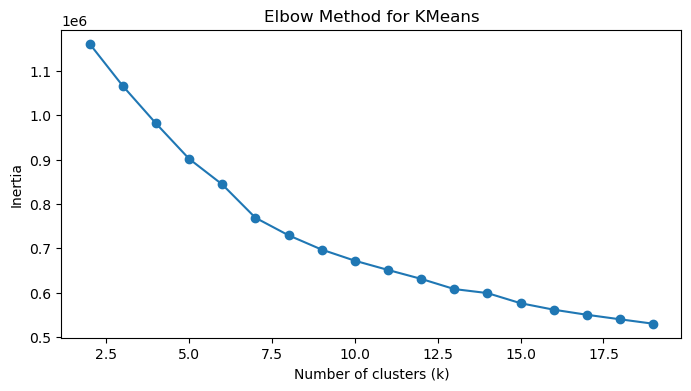

In [39]:
inertia_values = []
k_range = range(2, 20)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(np_features_copy)
    inertia_values.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for KMeans")
plt.show()

C:\Users\atuon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k = 10 the average silhouette score is: 0.1523580061661405


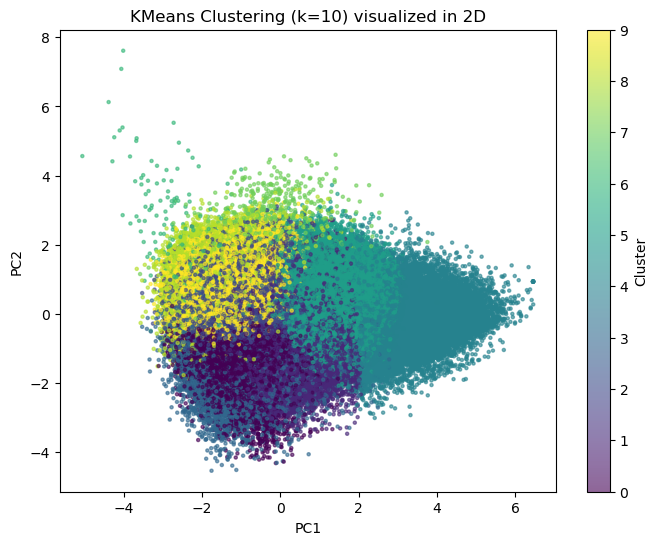

In [40]:
# k = 10
k = 10 
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(np_features_copy)

silhouette_avg = silhouette_score(np_features_copy, clusters)
print("For k =", k, "the average silhouette score is:", silhouette_avg)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(np_features_copy)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=5, alpha=0.6)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clustering (k=%d) visualized in 2D" % k)
plt.colorbar(label="Cluster")
plt.show()

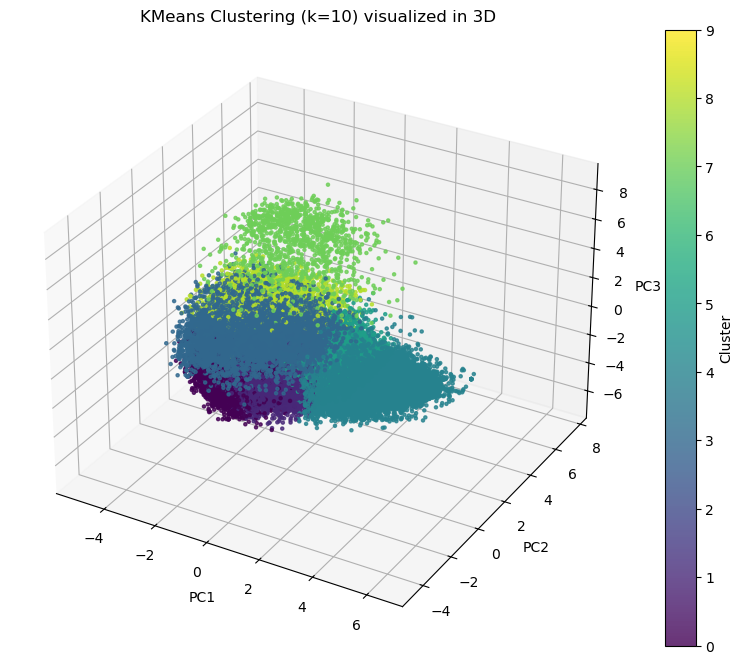

In [41]:

from mpl_toolkits.mplot3d import Axes3D 

# 使用 PCA 将数据降到 3 维
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(np_features_copy)

# 创建 3D 图形
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# draw 3d pict
sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                c=clusters, cmap='viridis', s=5, alpha=0.8)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("KMeans Clustering (k=%d) visualized in 3D" % k)
plt.colorbar(sc, label="Cluster")
plt.show()

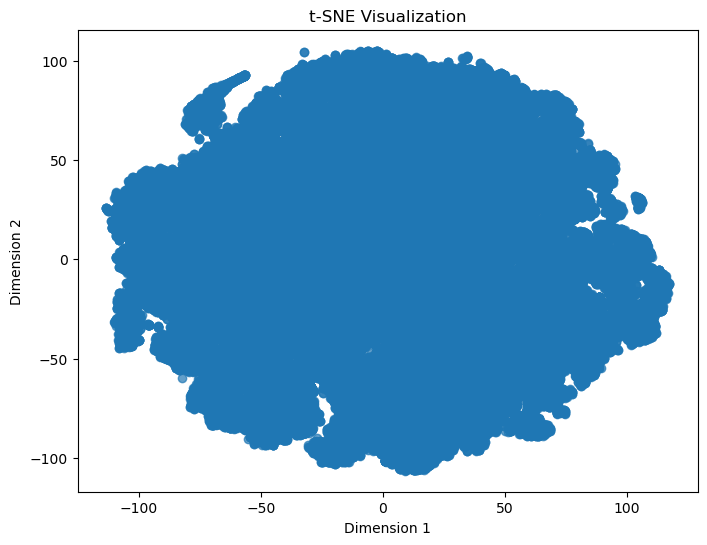

In [42]:
# TSNE
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(np_features_copy)

plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

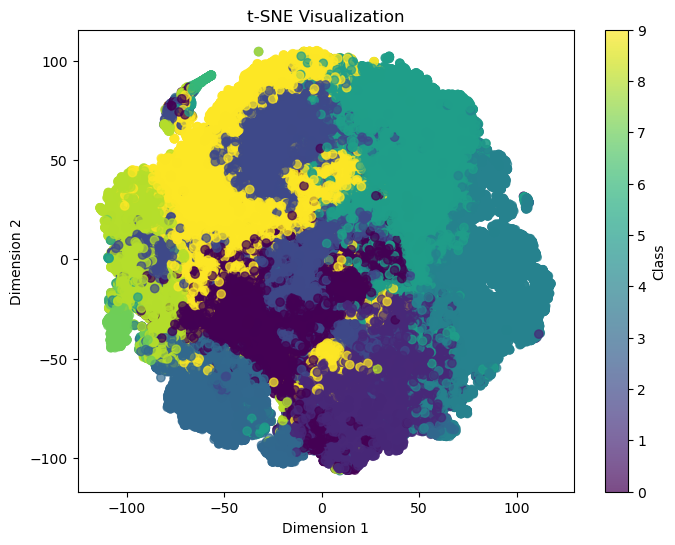

In [43]:
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=clusters, cmap='viridis', alpha=0.7)
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar(label="Class")
plt.show()

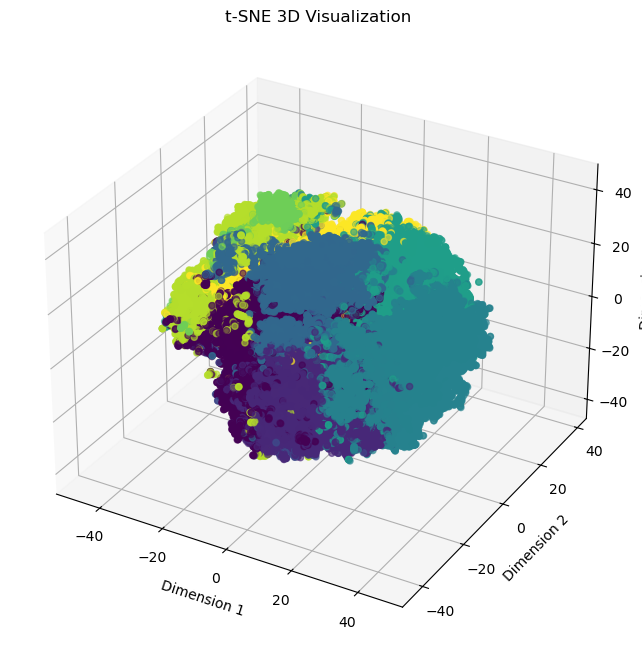

In [44]:
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(np_features_copy)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=clusters, cmap='viridis', alpha=0.6)
ax.set_title("t-SNE 3D Visualization")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")

plt.show()

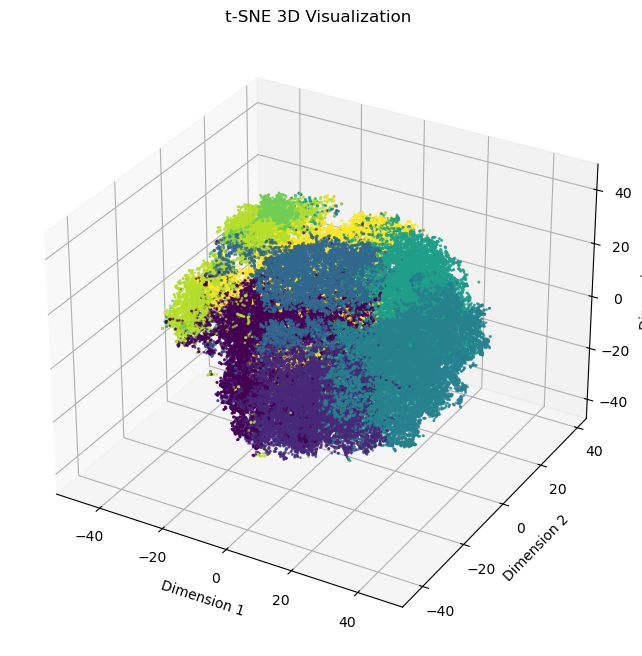

In [45]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], c=clusters, cmap='viridis',s=1, alpha=0.6)
ax.set_title("t-SNE 3D Visualization")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_zlabel("Dimension 3")

plt.show()

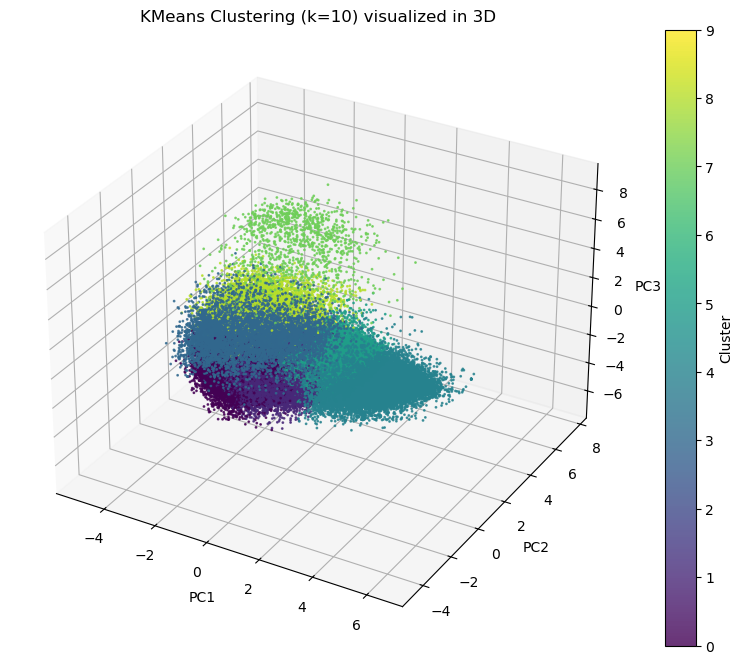

In [46]:
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(np_features_copy)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                c=clusters, cmap='viridis', s=1, alpha=0.8)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.set_title("KMeans Clustering (k=%d) visualized in 3D" % k)
plt.colorbar(sc, label="Cluster")
plt.show()

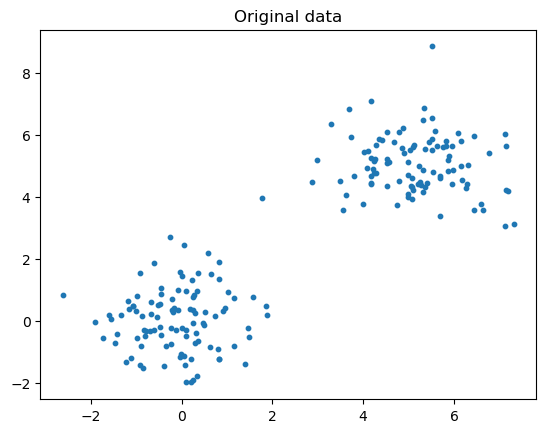

In [47]:
np.random.seed(42)
cluster1 = np.random.randn(100, 2) + np.array([0, 0])
cluster2 = np.random.randn(100, 2) + np.array([5, 5])
X = np.vstack((cluster1, cluster2))

plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title("Original data")
plt.show()

In [48]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)

gmm.fit(X)

labels = gmm.predict(X)

probs = gmm.predict_proba(X)

print("Predict label for every data point", labels)
print("The posterior probability of each data point is:\n", probs)

Predict label for every data point [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The posterior probability of each data point is:
 [[8.92459306e-13 1.00000000e+00]
 [5.30684931e-08 9.99999947e-01]
 [8.55465130e-15 1.00000000e+00]
 [1.27994677e-07 9.99999872e-01]
 [3.32323295e-13 1.00000000e+00]
 [5.71956697e-16 1.00000000e+00]
 [2.40442852e-18 1.00000000e+00]
 [5.26089790e-19 1.00000000e+00]
 [4.98410642e-15 1.00000000e+00]
 [1.13914454e-19 1.00000000e+00]
 [1.57821322e-10 1.00000000e+00]
 [2.14586141e-17 1.00000000e+00]
 [1.48226897e-14 1.00000000e+00]
 [3.72822988e-15 1.00000000e+00]
 [8.47902544e-16 1.00000000e+00]
 [5.52142958e

C:\Users\atuon\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


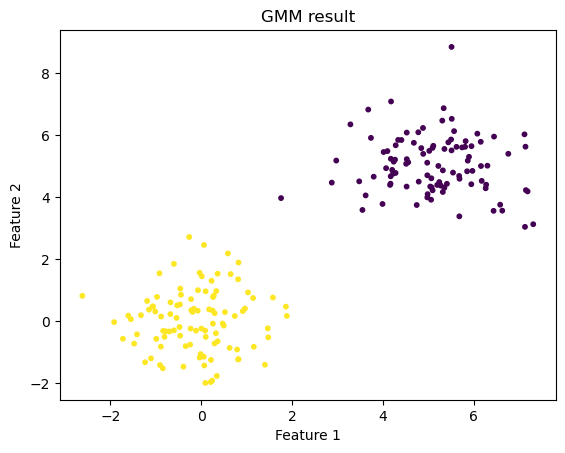

In [49]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=10, cmap='viridis')
plt.title("GMM result")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [50]:
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)

gmm.fit(X_pca_3d)

labels = gmm.predict(X_pca_3d)

probs = gmm.predict_proba(X_pca_3d)

print("Predict label for every data point：", labels)
print("The posterior probability of each data point is:\n", probs)

Predict label for every data point： [0 6 2 ... 1 6 0]
The posterior probability of each data point is:
 [[8.70431285e-01 3.15625348e-06 6.92561720e-03 ... 8.95151506e-15
  1.49904863e-06 1.06689805e-04]
 [3.37591024e-01 6.62509927e-06 3.24215006e-03 ... 4.22016986e-16
  6.17811397e-05 5.31040385e-06]
 [6.29860370e-02 1.02113178e-11 5.70380545e-01 ... 1.14736173e-29
  5.81436114e-20 5.17409853e-15]
 ...
 [1.16145262e-07 5.36502094e-01 4.13394965e-03 ... 2.74139681e-03
  2.98945083e-01 8.07709962e-02]
 [1.28719789e-02 5.84275320e-04 2.61417222e-02 ... 3.39248291e-13
  4.04324329e-04 6.36889387e-06]
 [4.17073129e-01 5.58248804e-06 2.71224160e-03 ... 6.74864789e-16
  6.71003345e-05 1.04025249e-05]]


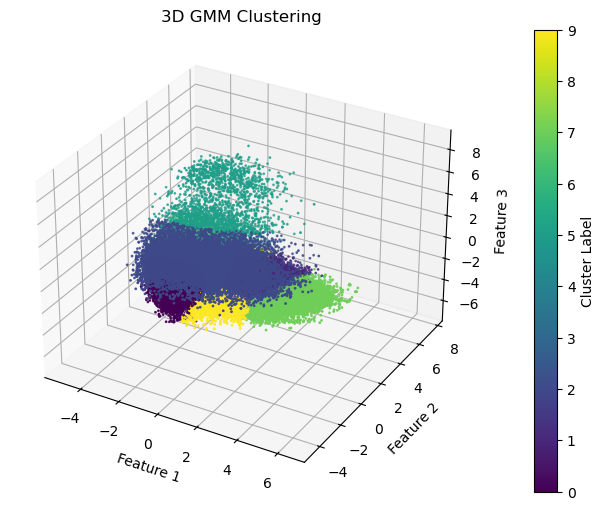

In [51]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # 3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
                     c=labels, cmap='viridis', s=1)

cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label("Cluster Label")

ax.set_title("3D GMM Clustering")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

plt.show()

In [52]:
gmm = GaussianMixture(n_components=10, covariance_type='full', random_state=42)

gmm.fit(X_tsne_3d)

labels = gmm.predict(X_tsne_3d)

probs = gmm.predict_proba(X_tsne_3d)

print("Predict label for every data point: ", labels)
print("The posterior probability of each data point is: \n", probs)

Predict label for every data point:  [0 0 1 ... 5 2 2]
The posterior probability of each data point is: 
 [[6.87947724e-01 1.77487966e-01 2.54598835e-05 ... 1.33720600e-01
  3.80502739e-11 2.61282381e-21]
 [7.42400262e-01 1.78297939e-01 5.07444111e-05 ... 7.87199632e-02
  1.86721551e-11 4.13019439e-21]
 [2.47580964e-07 9.98265525e-01 5.60971120e-04 ... 9.93513741e-05
  9.66035677e-04 4.30334793e-06]
 ...
 [8.62708978e-07 1.28333241e-04 1.98842675e-19 ... 2.34412569e-04
  1.04524052e-10 1.37662439e-18]
 [5.22279597e-04 1.11496416e-03 9.78045039e-01 ... 1.82635397e-15
  3.74392042e-08 3.84217989e-06]
 [8.11639615e-03 1.87980184e-01 7.40002967e-01 ... 6.45821557e-09
  1.74171554e-06 1.31306071e-05]]


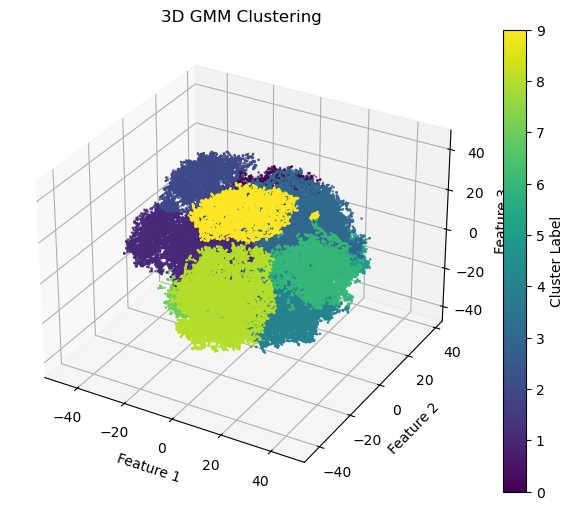

In [53]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2],
                     c=labels, cmap='viridis', s=0.5)

cbar = plt.colorbar(scatter, ax=ax, pad=0.05)
cbar.set_label("Cluster Label")

ax.set_title("3D GMM Clustering")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")

plt.show()